<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/TF_6_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컨볼루션 신경망(Convolution Neural Network, CNN)

## 주요 레이어

### Conv2D

- `tensorflow.keras.layers.Conv2D`

- `tf.nn.conv2d`

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np 
from sklearn.datasets import load_sample_image

In [ ]:
china = load_sample_image('china.jpg') / 255.
print(china.dtype)
print(china.shape)

float64
(427, 640, 3)


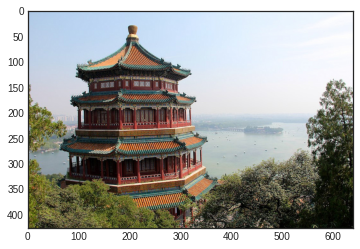

In [ ]:
plt.imshow(china)
plt.show()

In [ ]:
flower = load_sample_image('flower.jpg')
print(china.dtype)
print(china.shape)

float64
(427, 640, 3)


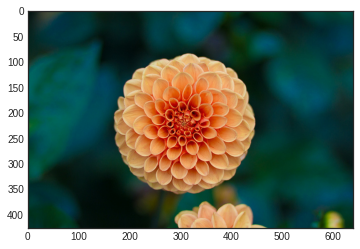

In [ ]:
plt.imshow(flower)
plt.show()

In [ ]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


In [ ]:
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

print(filters.shape)

(7, 7, 3, 2)


(2, 427, 640, 2)


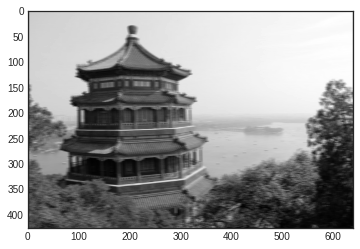

In [ ]:
output = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
print(output.shape)
plt.imshow(output[0, :, :, 1], cmap='gray')
plt.show( )

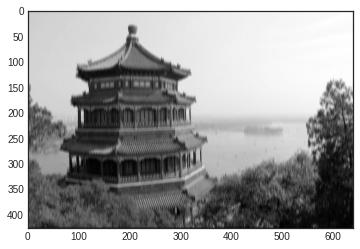

In [ ]:
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
conv = Conv2D(filters=32, kernel_size=3, strides=1,
              padding="same", activation='relu')

### MaxPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.max_pool`
  - 사용자가 사이즈를 맞춰줘야함
  - 케라스의 모델의 층으로 사용하고 싶으면 Lambda층으로 감싸줘야함

- 케라스 고수준 API
  - `keras.layers.MaxPool2D`


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D, AvgPool2D, Lambda

In [ ]:
output = tf.nn.max_pool(images,
                        ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3),
                        padding='VALID')

In [ ]:
output_keras = Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID")
)

In [ ]:
max_pool = MaxPool2D(pool_size=2)

In [ ]:
flower = load_sample_image('flower.jpg') / 255.
print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


In [ ]:
flower = np.expand_dims(flower, axis=0)
flower.shape

(1, 427, 640, 3)

In [ ]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu')(flower)
output = MaxPool2D(pool_size=2)(output)

output.shape

TensorShape([1, 213, 320, 32])

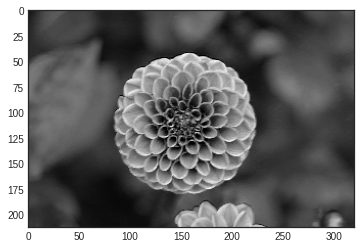

In [ ]:
plt.imshow(output[0, :, :, 4], cmap='gray')
plt.show()

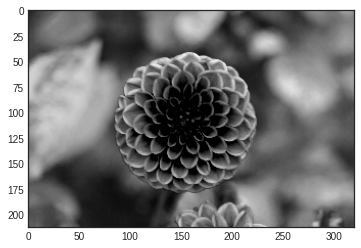

In [ ]:
plt.imshow(output[0, :, :, 8], cmap='gray')
plt.show()

### AvgPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.avg_pool`

- 케라스 고수준 API
  - `keras.layers.AvgPool2D`

In [ ]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu')(flower)
output = AvgPool2D(pool_size=2)(output)

output.shape

TensorShape([1, 213, 320, 32])

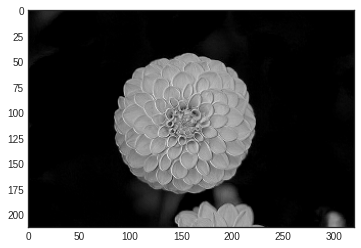

In [ ]:
plt.imshow(output[0, :, :, 2], cmap='gray')
plt.show()

### GlobalAvgPool2D (전역 평균 풀링 층)

- `keras.layers.GlobalAvgPool2D()`

- 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음

- 출력층에는 유용할 수 있음

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
flower.shape

(1, 427, 640, 3)

In [ ]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu')(flower)
output = GlobalAveragePooling2D()(output)

output.shape

TensorShape([1, 32])

## 예제로 보는 CNN 구조와 학습
- 모델 구현은 참고만


- [런타임] - [런타임 유형변경] - GPU 변경

### 일반적인 구조

#### modules import

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AvgPool2D, Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical, plot_model

#### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### CNN을 위한 간단한 모델

In [ ]:
def build():
  model = Sequential([Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]),
                      MaxPool2D(pool_size=2),
                      Conv2D(128, 3, activation='relu', padding='same'),
                      MaxPool2D(pool_size=2),
                      Conv2D(256, 3, activation='relu', padding='same'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(128, activation='relu'),
                      Dropout(0.5),
                      Dense(64, activation='relu'),
                      Dropout(0.5),
                      Dense(10, activation='softmax')])
  return model

#### 모델 컴파일

#### Hyper Parameters

#### 모델 학습
- `validation_split` 을 통해 검증 데이터셋을 생성


### LeNet-5

- 필기체 인식을 위한 모델

  <img src="https://hoya012.github.io/assets/img/image_classification_guidebook/1.PNG">

  <sub>https://www.researchgate.net/figure/The-LeNet-5-Architecture-a-convolutional-neural-network_fig4_321586653</sub>

- 코드 출처 : http://datahacker.rs/lenet-5-implementation-tensorflow-2-0/

#### module import

#### 데이터 로드 및 전처리

#### 모델 구성 및 컴파일

#### Hyper Parameters

#### 모델 학습

#### 학습 결과 시각화

#### 모델 평가